In [2]:
#=============================================================================
# Start from this

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo import gdal_array
from osgeo import gdalconst
from osgeo.gdalconst import GA_ReadOnly

In [4]:
os.chdir(r'D:\COOLYEAH\SEMESTER V\Penginderaan Jauh (A)\Citra Tubes\cropped citra')
B4=gdal.Open('LC08_L1TP_117066_20191010_20200825_02_T1_B4.tif')
B5=gdal.Open('LC08_L1TP_117066_20191010_20200825_02_T1_B5.tif')

In [5]:
print (B4)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001421BD8A480> >


In [6]:
geotrans_B4=B4.GetGeoTransform()
geotrans_B5=B5.GetGeoTransform()

data_B4=B4.GetRasterBand(1).ReadAsArray().astype(np.float32)
data_B5=B5.GetRasterBand(1).ReadAsArray().astype(np.float32)

In [7]:
print(type(data_B5))

<class 'numpy.ndarray'>


In [8]:
# print geotransform
print(geotrans_B4)
print(geotrans_B5)

(115.121655, 0.00027, 0.0, -8.366355, 0.0, -0.00027)
(115.121655, 0.00027, 0.0, -8.366355, 0.0, -0.00027)


In [9]:
#geo transform citra NIR
# geotransform = B5.GetGeoTransform()
originX,pixelWidth,empty,finalY,empty2,pixelHeight=geotrans_B5

cols =  B5.RasterXSize
rows =  B5.RasterYSize

projection = B5.GetProjection()
print("cols :", cols)
print("rows :", rows)
print("originX :", originX)
print("pixelWidth :", pixelWidth)
print("pixelHeight :", pixelHeight)
print("====================================================")
finalX = originX + pixelWidth * cols
print("finalX :", finalX)
originY = finalY + pixelHeight * rows
print("originY :", originY)

cols : 113
rows : 109
originX : 115.121655
pixelWidth : 0.00027
pixelHeight : -0.00027
finalX : 115.15216500000001
originY : -8.395785


In [10]:
ndvi = np.divide(data_B5 - data_B4, data_B5+ data_B4,where=(data_B5 - data_B4)!=0)
# print("NDVI Awal : ", ndvi)

# ndvi[ndvi == 0] = -999
# ndvi[ndvi < 0.5] = -999

ndvi[ndvi == 0] = -999
# ndvi[ndvi > 0.7] = -999


print(ndvi)

[[0.43763602 0.44135568 0.44867668 ... 0.3799616  0.3565953  0.37156656]
 [0.43491942 0.43971714 0.4492045  ... 0.36406195 0.38073498 0.40342242]
 [0.45273373 0.44566563 0.44381478 ... 0.3684819  0.38922203 0.3879307 ]
 ...
 [0.3895034  0.37191695 0.36801904 ... 0.26673672 0.3630723  0.3513684 ]
 [0.40906864 0.37035906 0.34662116 ... 0.31765375 0.3959947  0.36946702]
 [0.42338756 0.37868428 0.34309253 ... 0.3507671  0.4118915  0.39351776]]


In [11]:
ndvi_avg = np.mean(ndvi)

if ndvi_avg <= 0.92 and ndvi_avg >= 0.721:
    print('sangat baik')
elif ndvi_avg <= 0.72 and ndvi_avg >= 0.421:
    print('baik')
elif ndvi_avg <= 0.42 and ndvi_avg >= 0.221:
    print('normal')
elif ndvi_avg <= 0.22 and ndvi_avg >= 0.11:
    print('buruk')

normal


In [12]:
def saveRaster(dataset,datasetPath,cols,rows,projection):
    rasterSet = gdal.GetDriverByName('GTiff').Create(datasetPath, cols, rows,1,gdal.GDT_Float32)
    rasterSet.SetProjection(projection)
    rasterSet.SetGeoTransform(geotrans_B5)
    rasterSet.GetRasterBand(1).WriteArray(dataset)
    rasterSet.GetRasterBand(1).SetNoDataValue(-999)
    rasterSet = None

In [13]:
os.chdir(r'D:\COOLYEAH\SEMESTER V\Penginderaan Jauh (A)\Citra Tubes\cropped citra\output')
path_NDVI='ndvi_output.tif'
saveRaster(ndvi,path_NDVI,cols,rows,projection)

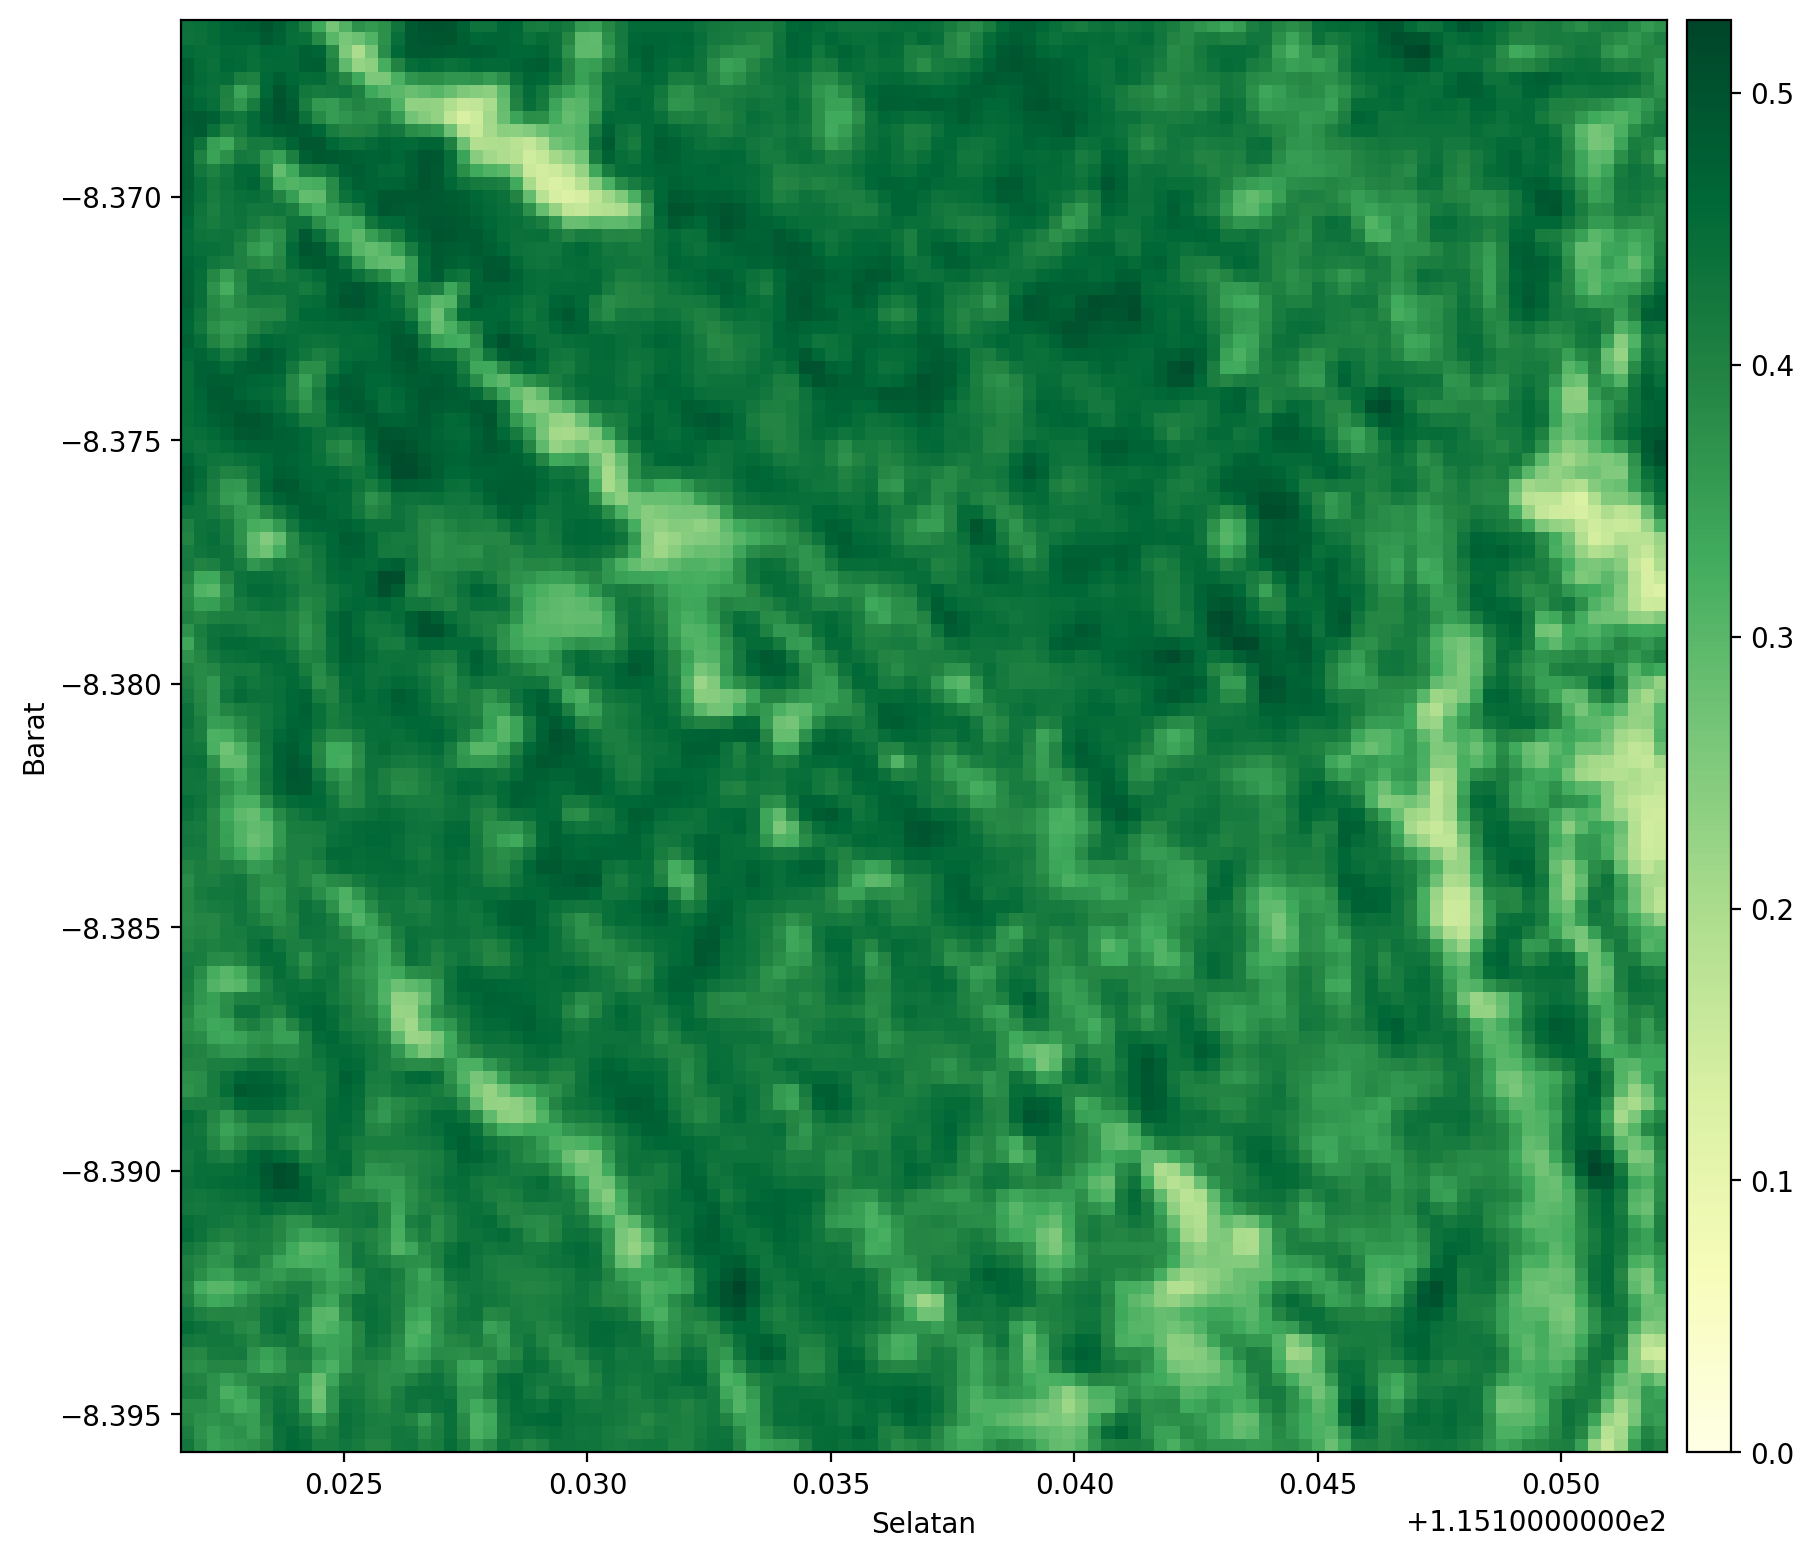

In [14]:
extentArray = [originX,finalX,originY,finalY]
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plotNDVI(ndviImage,extentArray,vmin,cmap):
    ndvi2 = gdal.Open(ndviImage)
    ndvi_array = ndvi2.ReadAsArray()
    fig=plt.figure(figsize=(10,10), dpi=200)
    im = plt.imshow(ndvi_array, vmin=vmin, cmap=cmap, extent=extentArray)
    
    # plt.colorbar(im, fraction=0.015)
    # im = ax.imshow(np.arange(100).reshape((10,10)))

    plt.xlabel('Selatan')
    plt.ylabel('Barat')
    # ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(im, cax=cax)
    # ax.set_axis_off()
    # fig.add_axes(ax)
    # plt.savefig(image_name, bbox_inches='tight')    
    plt.show()
    

plotNDVI(path_NDVI,extentArray,0,'YlGn')

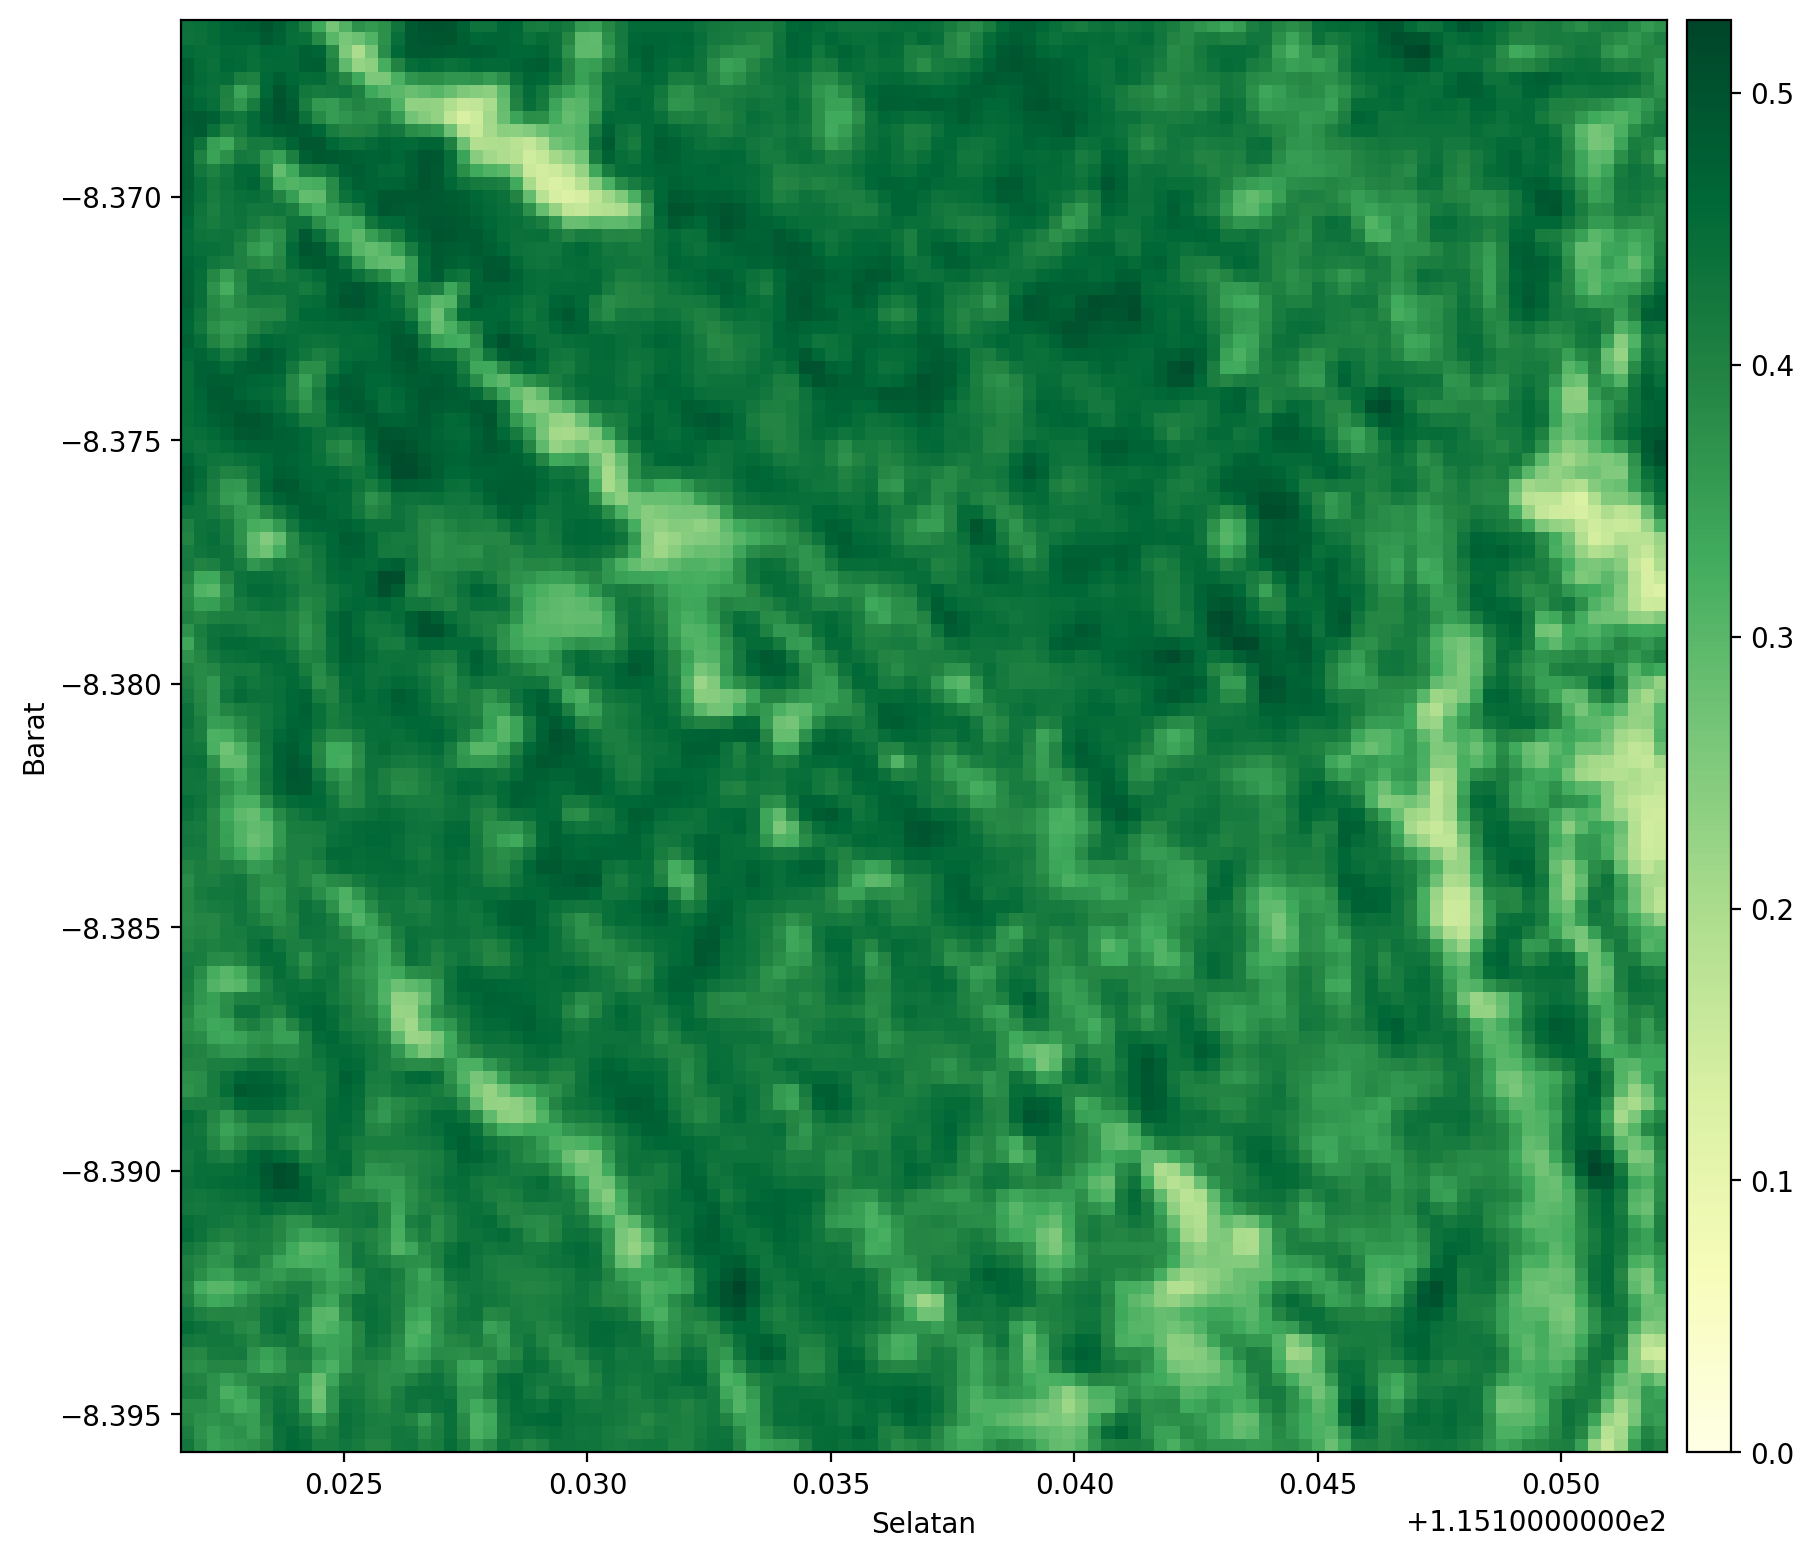

In [25]:
os.chdir(r'D:\COOLYEAH\SEMESTER V\Penginderaan Jauh (A)\Jatiluwih')
path_NDVI='atmospheric_correction B4.tif'
saveRaster(ndvi,path_NDVI,cols,rows,projection)

extentArray = [originX,finalX,originY,finalY]
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plotNDVI(ndviImage,extentArray,vmin,cmap):
    ndvi2 = gdal.Open(ndviImage)
    ndvi_array = ndvi2.ReadAsArray()
    fig=plt.figure(figsize=(10,10), dpi=200)
    im = plt.imshow(ndvi_array, vmin=vmin, cmap=cmap, extent=extentArray)
    
    # plt.colorbar(im, fraction=0.015)
    # im = ax.imshow(np.arange(100).reshape((10,10)))

    plt.xlabel('Selatan')
    plt.ylabel('Barat')
    # ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(im, cax=cax)
    # ax.set_axis_off()
    # fig.add_axes(ax)
    # plt.savefig(image_name, bbox_inches='tight')    
    plt.show()
    

plotNDVI(path_NDVI,extentArray,0,'YlGn')

===============================NDVI PADI SANGAT BAIK===============================

In [16]:
ndviPadiSangatBaik = ndvi.copy()
ndviPadiSangatBaik = np.where((ndvi > 0.721) & (ndvi < 0.92),ndviPadiSangatBaik,-999)
ndviPadiSangatBaik

array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]], dtype=float32)

In [17]:
np.mean(ndviPadiSangatBaik)

-999.0

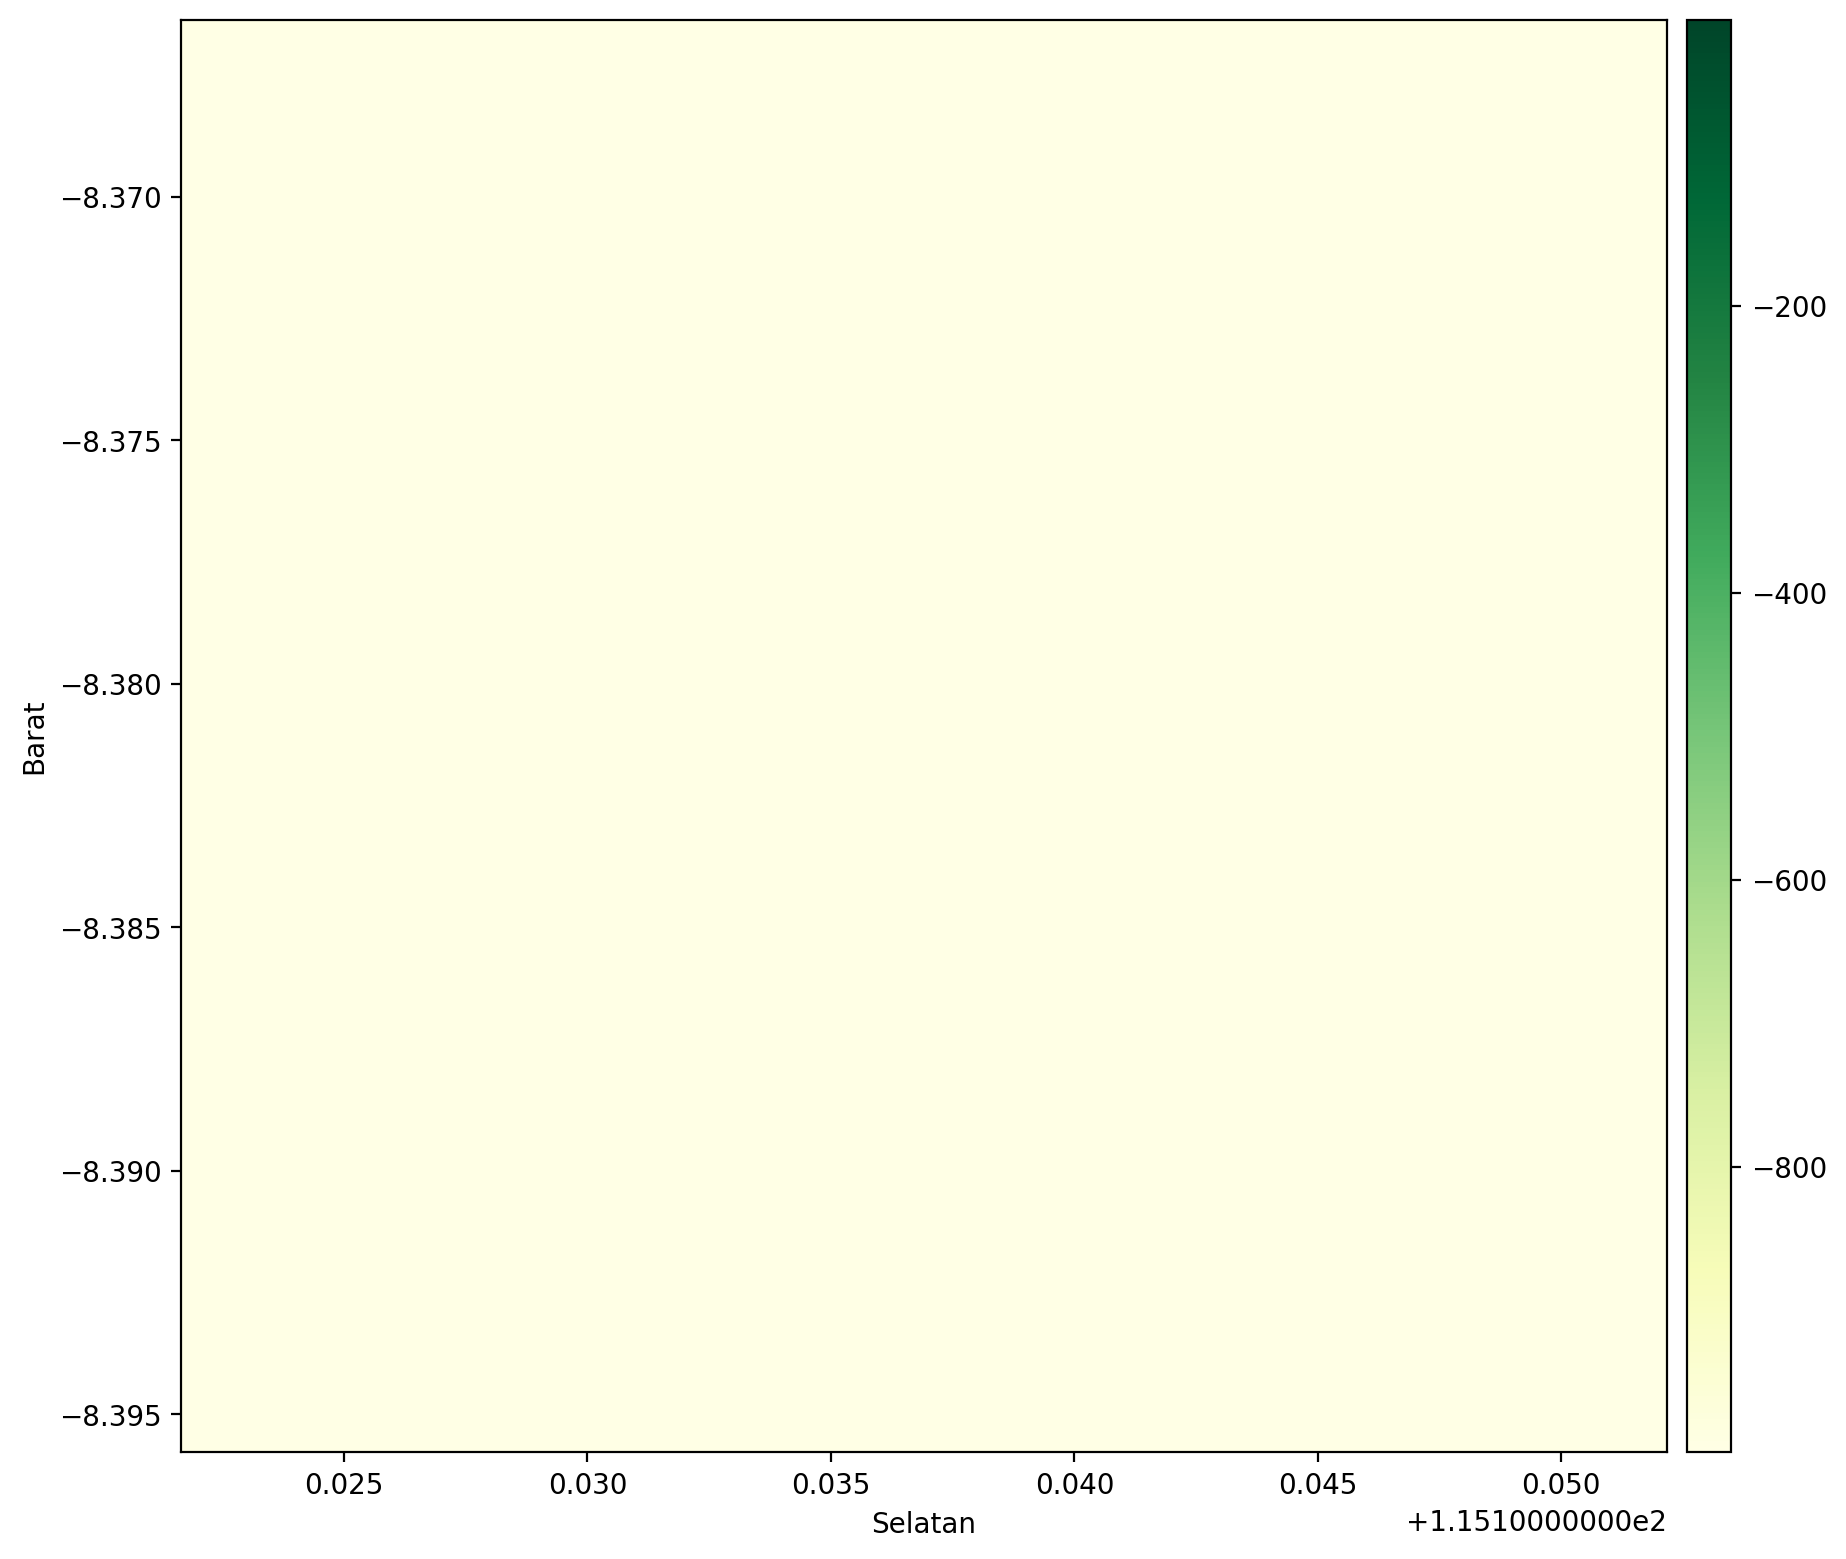

In [18]:
path_ndviPadiSangatBaik = 'NDVI_Padi_Sangat Baik.tif'
saveRaster(ndviPadiSangatBaik, path_ndviPadiSangatBaik,cols,rows,projection)

plotNDVI(path_ndviPadiSangatBaik, extentArray,-0.5,'YlGn')

===============================NDVI PADI BAIK===============================

In [19]:
ndviPadiBaik = ndvi
ndviPadiBaik = np.where((ndvi > 0.421) & (ndvi < 0.72),ndviPadiBaik,-999)
ndviPadiBaik

array([[ 4.3763602e-01,  4.4135568e-01,  4.4867668e-01, ...,
        -9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
       [ 4.3491942e-01,  4.3971714e-01,  4.4920450e-01, ...,
        -9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
       [ 4.5273373e-01,  4.4566563e-01,  4.4381478e-01, ...,
        -9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
       ...,
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
        -9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
        -9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
       [ 4.2338756e-01, -9.9900000e+02, -9.9900000e+02, ...,
        -9.9900000e+02, -9.9900000e+02, -9.9900000e+02]], dtype=float32)

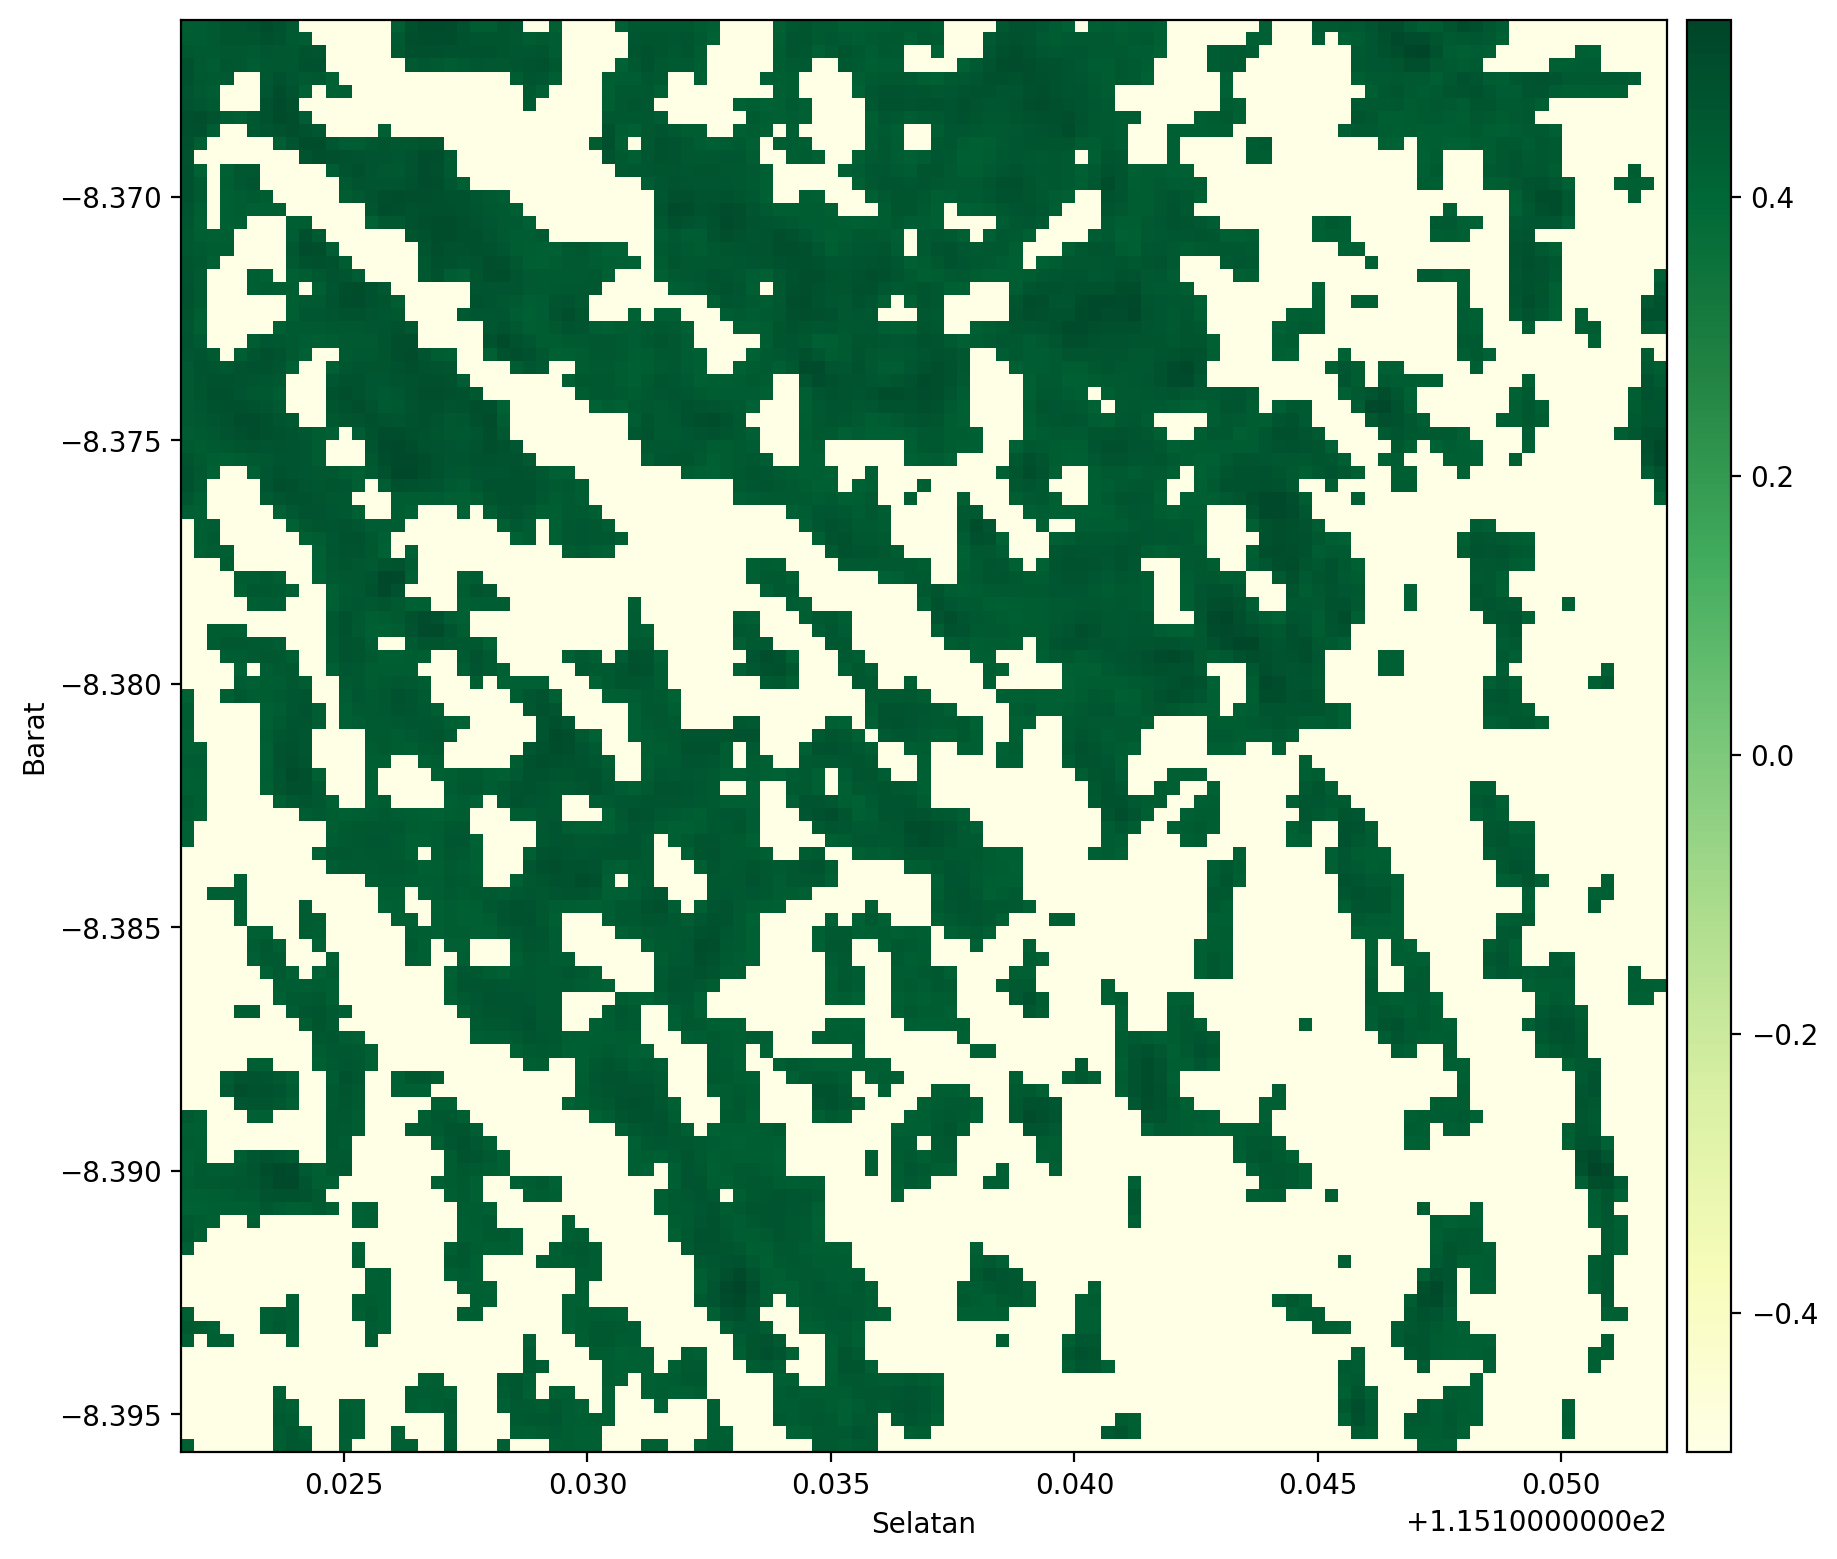

In [20]:
path_ndviPadiBaik = 'NDVI_Padi_Baik.tif'
saveRaster(ndviPadiBaik, path_ndviPadiBaik,cols,rows,projection)

plotNDVI(path_ndviPadiBaik, extentArray,-0.5,'YlGn')

===============================NDVI PADI NORMAL===============================

In [21]:
ndviPadiNormal = ndvi
ndviPadiNormal = np.where((ndvi > 0.221) & (ndvi < 0.42),ndviPadiNormal,-999)
ndviPadiNormal

array([[-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
         3.7996161e-01,  3.5659531e-01,  3.7156656e-01],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
         3.6406195e-01,  3.8073498e-01,  4.0342242e-01],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
         3.6848190e-01,  3.8922203e-01,  3.8793069e-01],
       ...,
       [ 3.8950339e-01,  3.7191695e-01,  3.6801904e-01, ...,
         2.6673672e-01,  3.6307231e-01,  3.5136840e-01],
       [ 4.0906864e-01,  3.7035906e-01,  3.4662116e-01, ...,
         3.1765375e-01,  3.9599469e-01,  3.6946702e-01],
       [-9.9900000e+02,  3.7868428e-01,  3.4309253e-01, ...,
         3.5076711e-01,  4.1189149e-01,  3.9351776e-01]], dtype=float32)

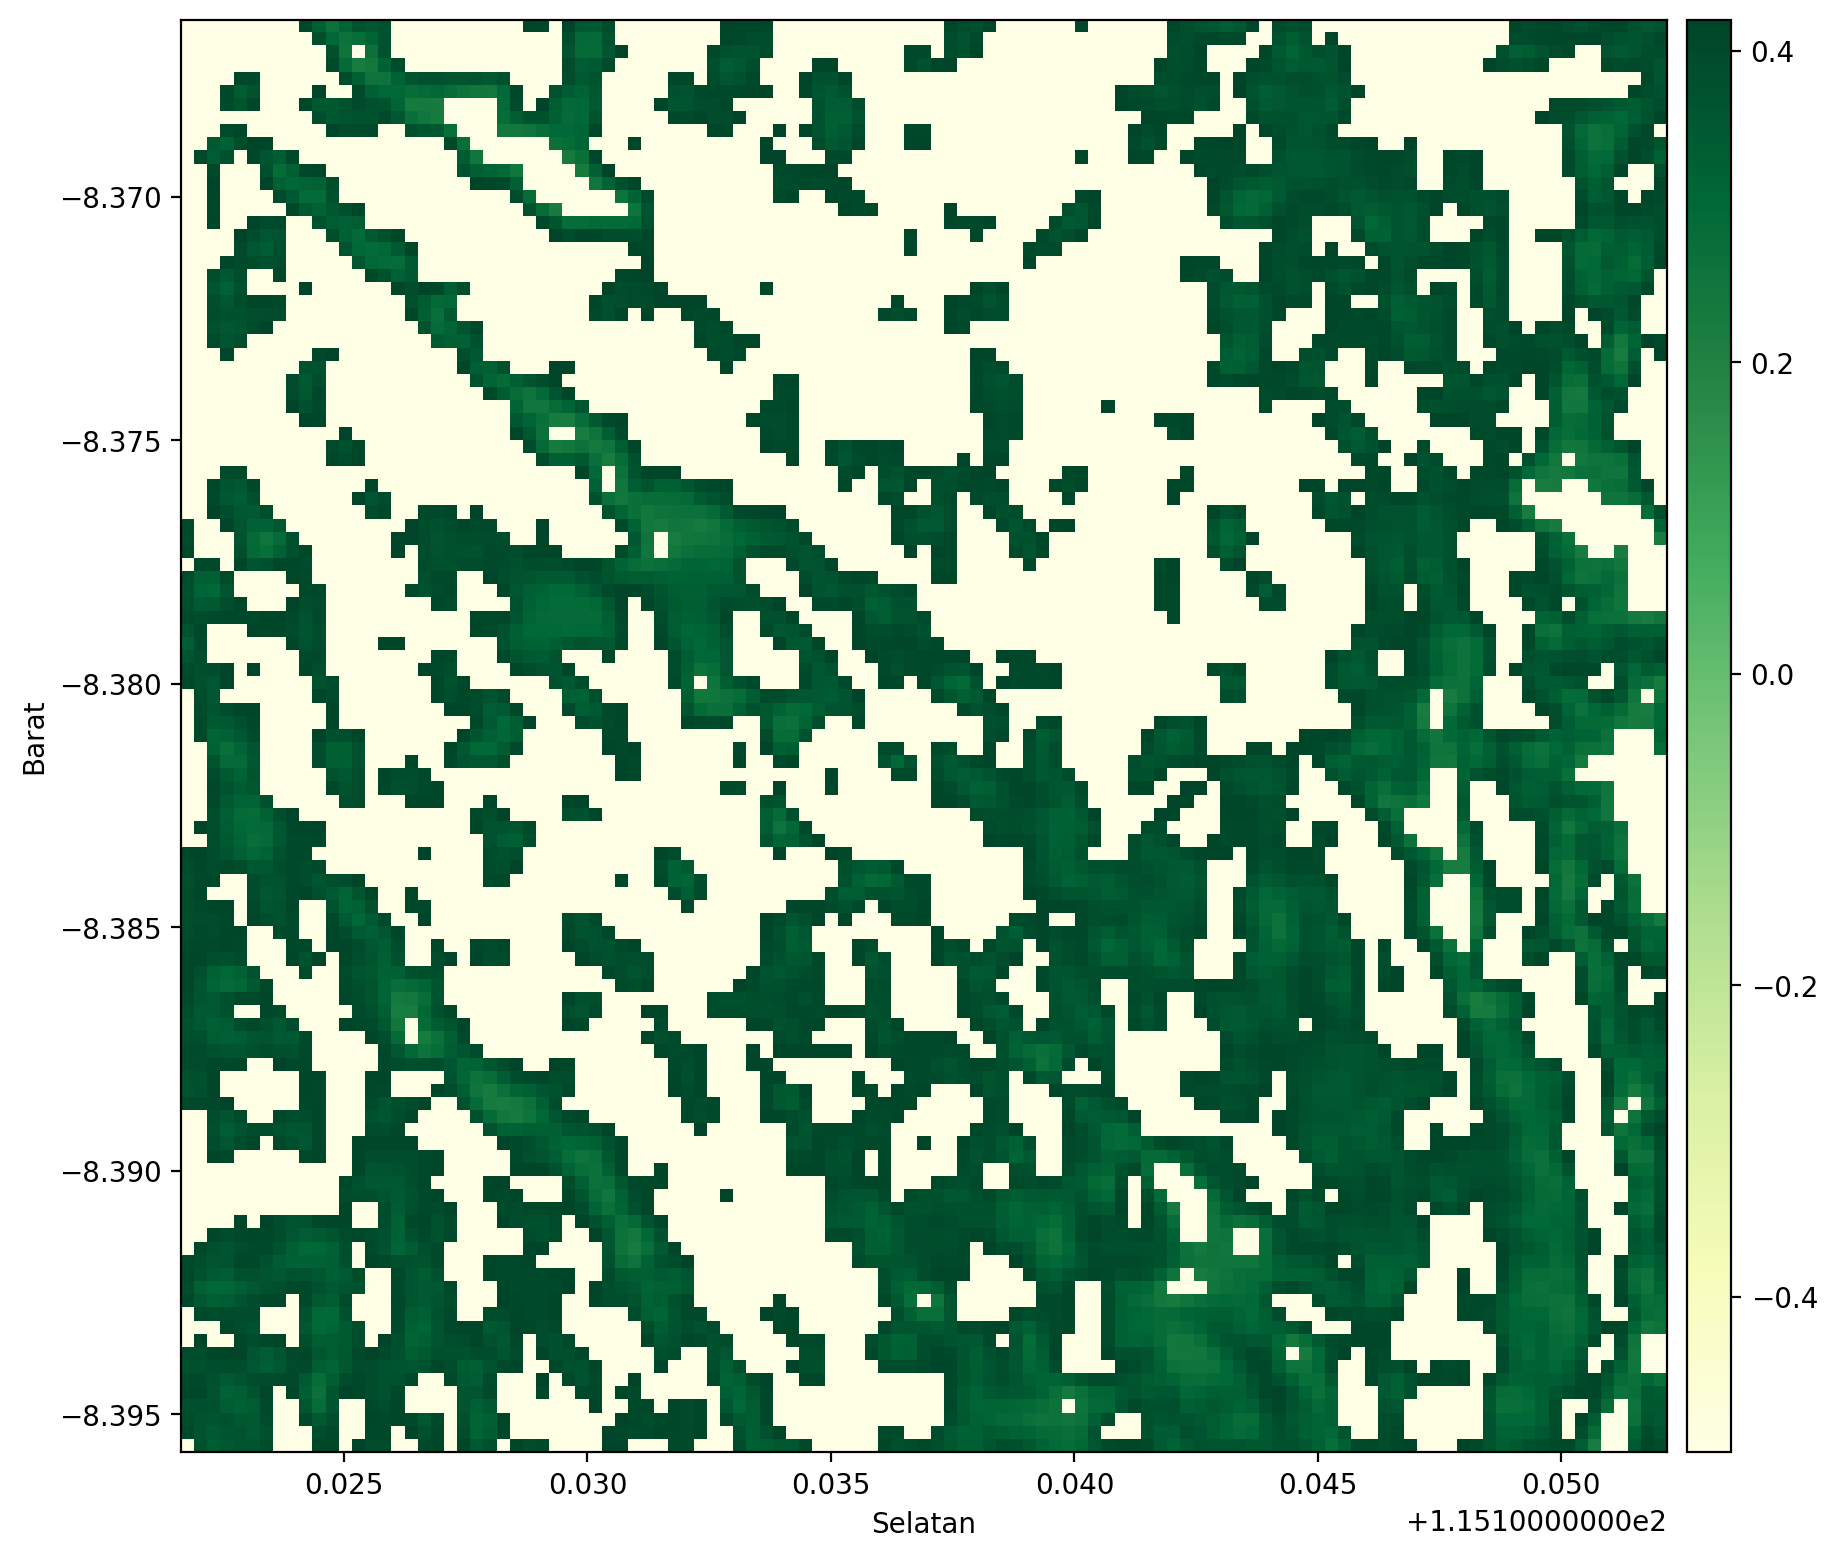

In [22]:
path_ndviPadiNormal = 'NDVI_Padi_Normal.tif'
saveRaster(ndviPadiNormal, path_ndviPadiNormal,cols,rows,projection)

plotNDVI(path_ndviPadiNormal, extentArray,-0.5,'YlGn')

===============================NDVI PADI BURUK===============================

In [23]:
ndviPadiBuruk = ndvi
ndviPadiBuruk = np.where((ndvi > 0.11) & (ndvi < 0.22),ndviPadiBuruk,-999)
ndviPadiBuruk

array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]], dtype=float32)

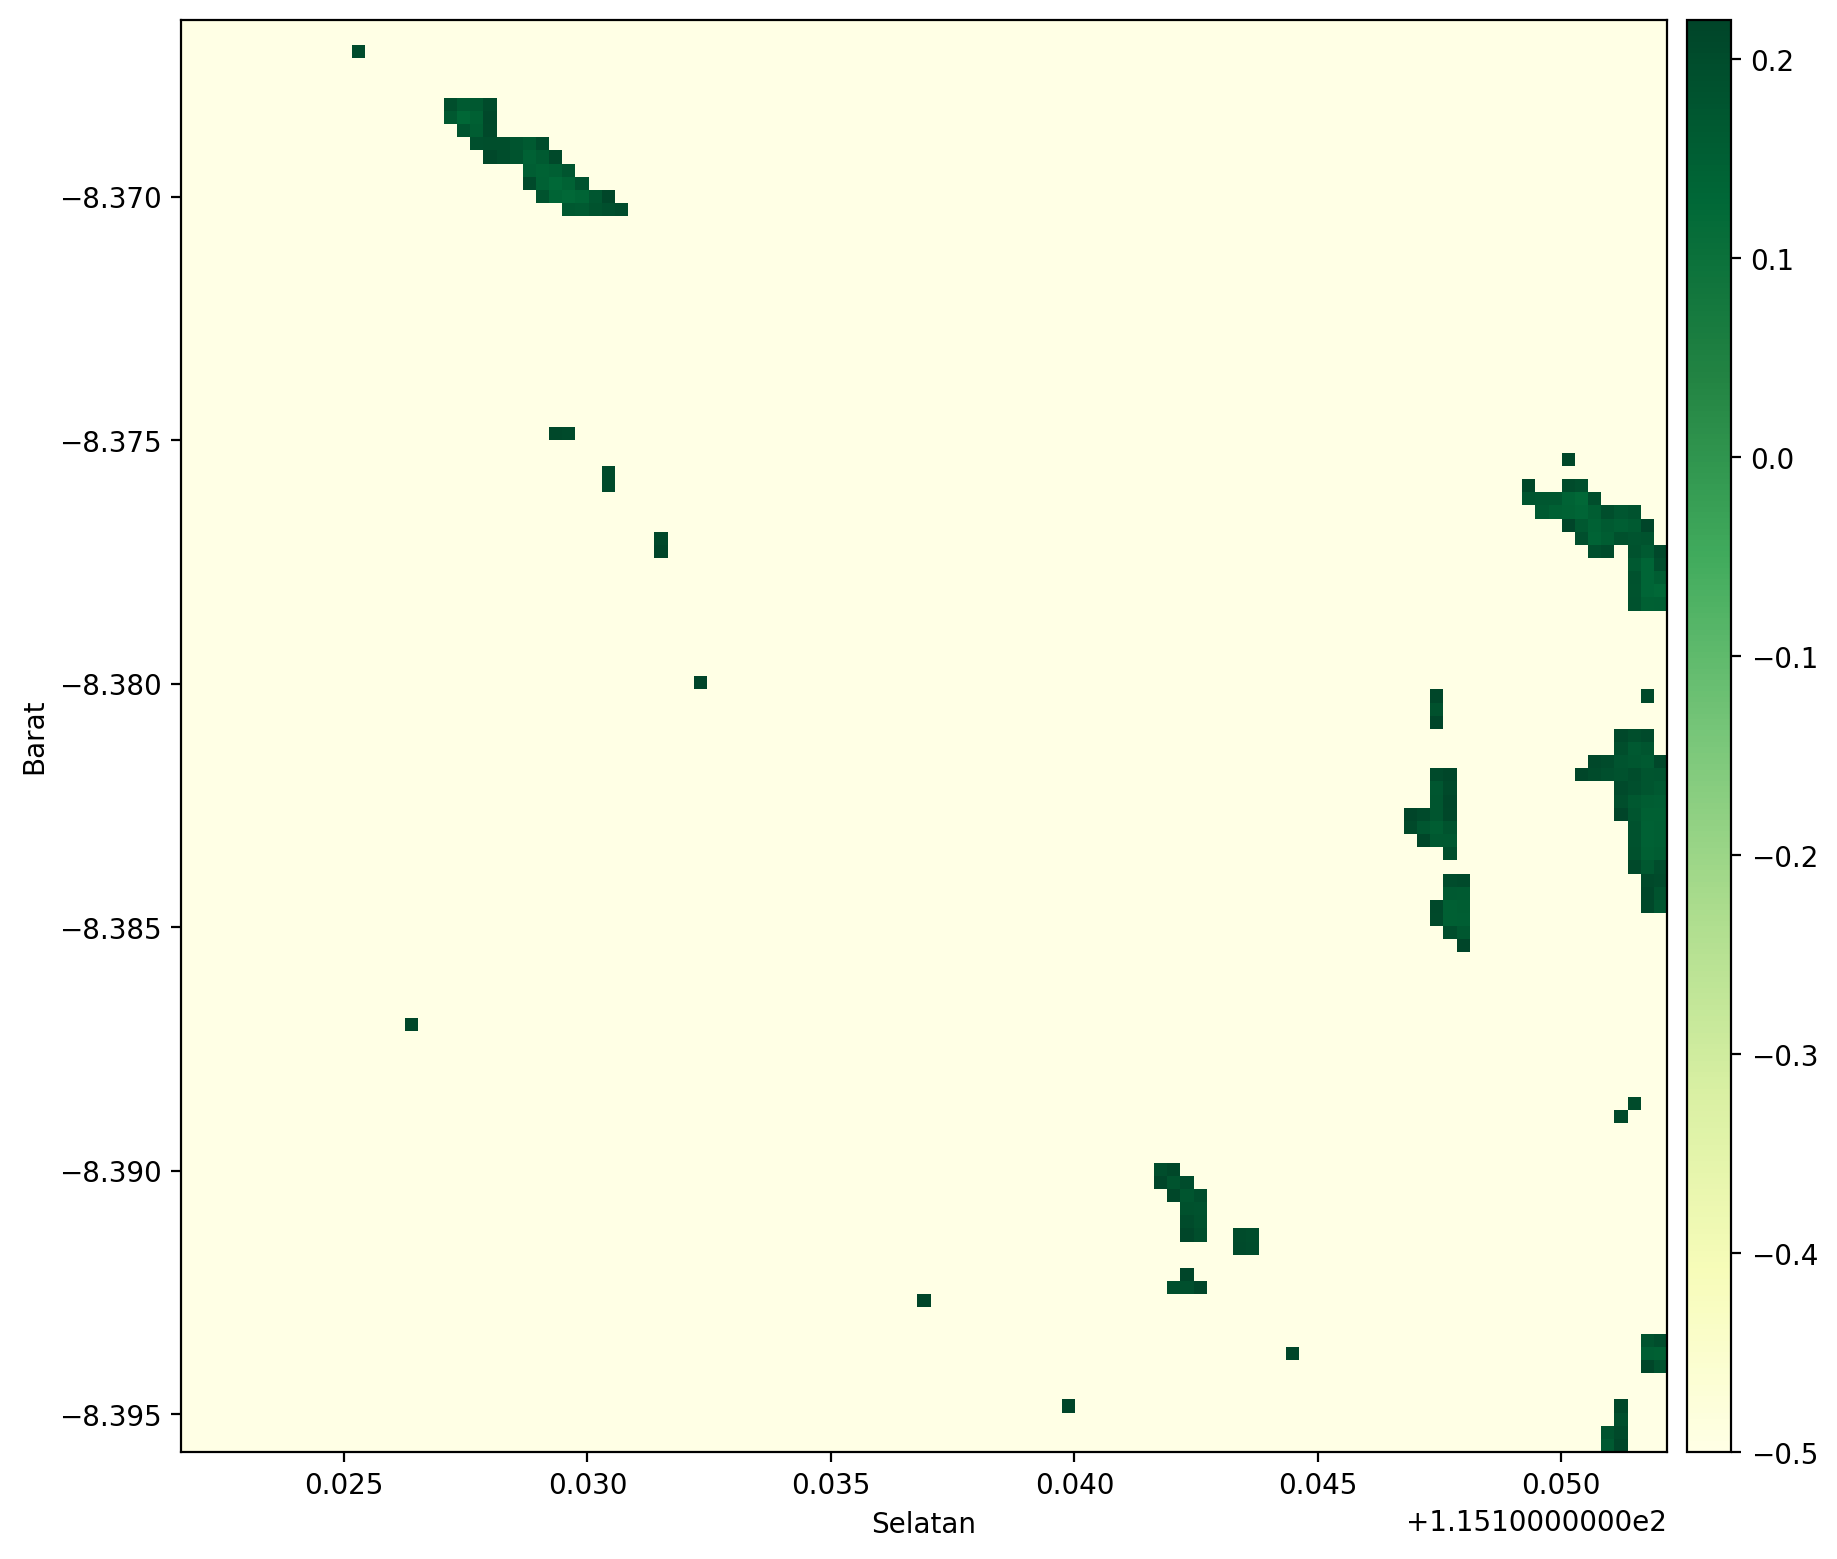

In [24]:
path_ndviPadiBuruk = 'NDVI_Padi_Buruk.tif'
saveRaster(ndviPadiBuruk, path_ndviPadiBuruk,cols,rows,projection)

plotNDVI(path_ndviPadiBuruk, extentArray,-0.5,'YlGn')